**Biderectional LSTM Model w/ Extra Neural Network Layer on APPLE stock (120 day prediction)**

[*********************100%***********************]  1 of 1 completed


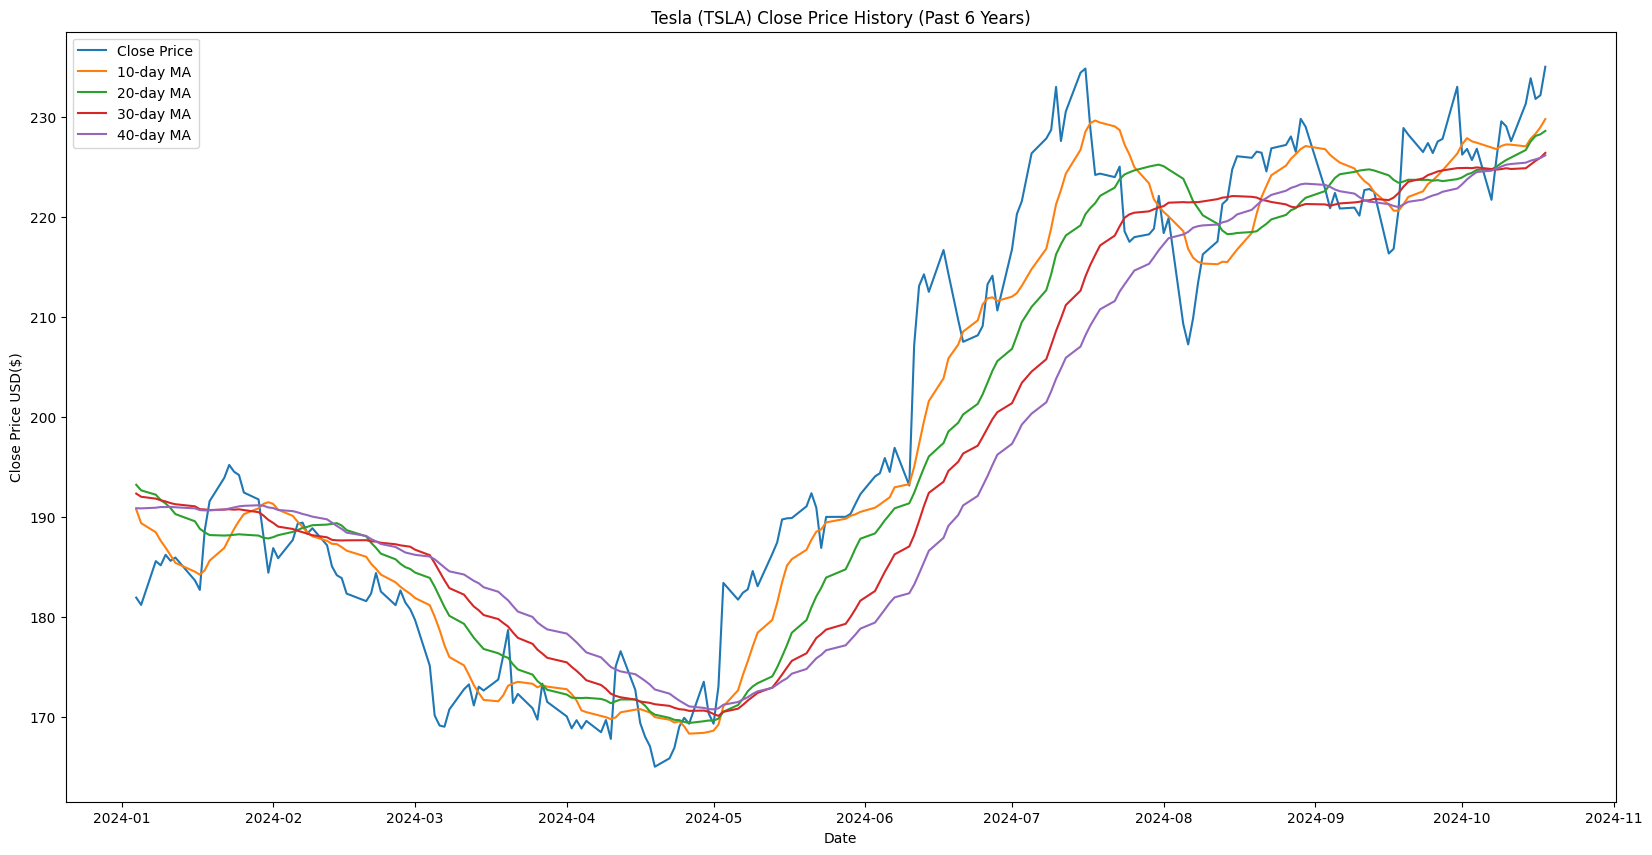

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
import os

# Disable unnecessary TensorFlow optimizations for the system
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

# Fetch Tesla stock data from Yahoo Finance (last 6 years)
ticker = "AAPL"
df = yf.download(ticker, start="2020-01-01", end="2024-10-19")

# Display the first few rows to check the data
df.head()

# Replace any null values with NaN and convert necessary columns to float
df.replace("null", np.nan, inplace=True)
df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]] = df[["Open", "High", "Low", "Close", "Adj Close", "Volume"]].astype(float)

# Create rolling means for visualization (10, 20, 30, 40 day windows)
df_10 = pd.DataFrame()
df_10['Close'] = df['Close'].rolling(window=10).mean()
df_20 = pd.DataFrame()
df_20['Close'] = df['Close'].rolling(window=20).mean()
df_30 = pd.DataFrame()
df_30['Close'] = df['Close'].rolling(window=30).mean()
df_40 = pd.DataFrame()
df_40['Close'] = df['Close'].rolling(window=40).mean()

# Visualize the data
plt.figure(figsize=(20,10))
plt.plot(df['Close'].tail(200), label='Close Price')
plt.plot(df_10['Close'].tail(200), label='10-day MA')
plt.plot(df_20['Close'].tail(200), label='20-day MA')
plt.plot(df_30['Close'].tail(200), label='30-day MA')
plt.plot(df_40['Close'].tail(200), label='40-day MA')
plt.title('Tesla (TSLA) Close Price History (Past 6 Years)')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc='upper left')
plt.show()


In [116]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data.head()

,Close
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501


In [117]:
dataset = data.values

In [118]:
import math
training_data_len = math.ceil(len(dataset)*.9)
training_data_len

train = df[:training_data_len]


In [119]:
# Scale the data
scaler = MinMaxScaler()#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data, scaled_data.shape

(array([[0.1061722 ],
        [0.10209186],
        [0.10540362],
        ...,
        [0.98200187],
        [0.98406995],
        [1.        ]]),
 (1208, 1))

In [120]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.1061722 , 0.10209186, 0.10540362, 0.10343337, 0.11014072,
       0.11913979, 0.12011793, 0.1293825 , 0.12340175, 0.12152928,
       0.12697902, 0.13185587, 0.12883754, 0.13041658, 0.13255455,
       0.13126895, 0.11818959, 0.13040259, 0.13969509, 0.13903833,
       0.11897211, 0.11778434, 0.13202355, 0.13565672, 0.1409108 ,
       0.13367243, 0.13579642, 0.13308552, 0.1436916 , 0.1404357 ,
       0.14054751, 0.13223314, 0.13868899, 0.13404971, 0.12391877,
       0.10313989, 0.08902644, 0.09541243, 0.06868073, 0.06845715,
       0.10402024, 0.09075921, 0.10951189, 0.09578975, 0.09035396,
       0.0584101 , 0.08519766, 0.07134972, 0.03334125, 0.07489905,
       0.0249291 , 0.03981108, 0.03116136, 0.02852033, 0.00680521,
       0.        , 0.03145482, 0.02955439, 0.04760841, 0.03265655])]
[0.04253595046841413]

[array([0.1061722 , 0.10209186, 0.10540362, 0.10343337, 0.11014072,
       0.11913979, 0.12011793, 0.1293825 , 0.12340175, 0.12152928,
       0.12697902, 0.13185587, 0.12

In [121]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1028, 60, 1)

In [122]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

/home/mili/.local/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 75s 53ms/step - loss: 0.0062
Epoch 2/3
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 58s 56ms/step - loss: 0.0013
Epoch 3/3
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 59s 57ms/step - loss: 9.6567e-04


In [123]:
n_days_to_predict = 120
test = df[training_data_len:training_data_len+n_days_to_predict]
y_test = dataset[training_data_len:training_data_len + n_days_to_predict, 0]  # Assuming the 'Close' prices are in the first column
y_test = y_test.reshape(-1, 1)  # Reshape for consistency (optional)

In [124]:
# Prepare the initial test data set
# last_60_days = scaled_data[training_data_len - 60:, :]

# last_60_days = train_data[-60:, :]
# x_test = last_60_days.reshape(1, -1, 1)
x_test = x_train[-60:,:].reshape(1,-1,1)
# Initialize an empty list to hold predictions
predictions = []

# Predict for the next N days (or the length of the test set)
# n_days_to_predict = len(dataset) - training_data_len
"""
print(y_test[0])
lstm_prediction = model.predict(x_train[-60:]).flatten()[-1]
lstm_prediction = scaler.inverse_transform(np.array(lstm_prediction).reshape(-1, 1))
print("a",lstm_prediction)
"""
for i in range(n_days_to_predict):
    # Get the model's prediction for the next time step
    # lstm_prediction = model.predict(x_test)
    # lstm_prediction = scaler.inverse_transform(np.array(lstm_prediction).reshape(-1, 1))
    lstm_prediction = model.predict(x_test).flatten()[-1].reshape(-1, 1)
    # lstm_prediction = scaler.inverse_transform(np.array(lstm_prediction).reshape(-1, 1))
    
    # print("pred_val",lstm_prediction)
    print(lstm_prediction.reshape(1, 1, 1))
    
    # print(lstm_prediction - y_test[i])
    # Store the prediction
    predictions.append(scaler.inverse_transform(np.array(lstm_prediction)))
    print(predictions[-1]-y_test[i])
    # Prepare the input for the next prediction
    x_test = np.append(x_test[:, 1:, :], lstm_prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the predictions to get actual price values


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[[0.640683]]]
[[0.38549805]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
[[[0.64572704]]]
[[2.31790161]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
[[[0.65100527]]]
[[-0.46777344]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
[[[0.65635514]]]
[[-9.86064148]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
[[[0.66166353]]]
[[-7.24093628]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
[[[0.6669764]]]
[[-6.98040771]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
[[[0.6721508]]]
[[-6.39468384]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[[0.6772758]]]
[[-7.30778503]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
[[[0.6823163]]]
[[-4.88600159]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
[[[0.6873126]]]
[[-7.22212219]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
[[[0.6922448]]]
[[-7.48971558]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
[[[0.6971639]]]
[[-8.8996582]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
[[[0.70201826]]]
[[-8.15116882]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
[[[0.70683587]]]
[[-7.31925964]]
1/1 ━━━━━━

In [125]:
# Convert the data to a numpy array
print(len(predictions))
x_test = np.array(x_test)
x_test.shape

# Extract the training data from the scaled dataset
train_data = scaled_data[:training_data_len, :]

# Create the datasets x_train and y_train
x_train = []
y_train = dataset[:training_data_len, :]  # Assuming y_train is taken from the same dataset

# Use the last 60 time steps for input features
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])  # Last 60 data points for input

# Convert x_train to a NumPy array
x_train = np.array(x_train)

# Reshape x_train for LSTM input: [samples, time_steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Adding a third dimension

# Align y_train with x_train
y_train = y_train[60:, 0]  # Assuming we want to predict the 'Close' price

# Check shapes to confirm they match
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Ensure y_train has the same number of samples as x_train
if x_train.shape[0] != y_train.shape[0]:
    raise ValueError("Mismatch between number of samples in x_train and y_train")

# Make predictions on the training data
lstm_train_predictions = model.predict(x_train)
# print(lstm_train_predictions)
# Inverse transform the predictions to get actual price values
lstm_train_predictions = scaler.inverse_transform(lstm_train_predictions)

# Check the shape of lstm_train_predictions
print(f"lstm_train_predictions shape: {lstm_train_predictions.shape}")


120
x_train shape: (1028, 60, 1)
y_train shape: (1028,)
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
lstm_train_predictions shape: (1028, 1)


In [126]:
print(predictions[0:5], y_test[0:5])

[array([[170.7155]], dtype=float32), array([[171.6179]], dtype=float32), array([[172.56223]], dtype=float32), array([[173.51936]], dtype=float32), array([[174.46907]], dtype=float32)] [[170.33000183]
 [169.30000305]
 [173.02999878]
 [183.38000488]
 [181.71000671]]


In [127]:
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(mse, rmse)

mse = np.mean(lstm_train_predictions-y_train)**2
rmse = np.sqrt(np.mean(lstm_train_predictions-y_train)**2)
print(mse, rmse)



124.17656659306027 11.143453979492188
1.9790637172177563 1.4067919950077041


/tmp/ipykernel_6120/1446644265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<Figure size 640x480 with 0 Axes>

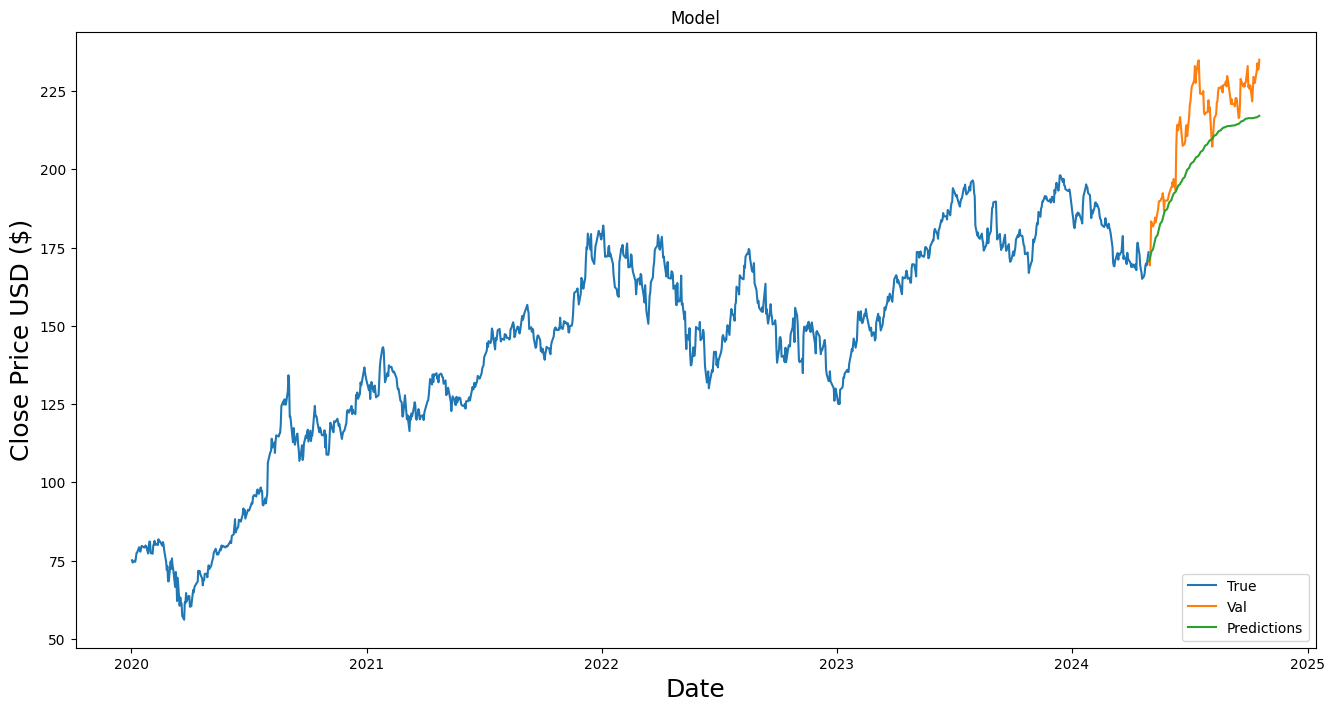

In [128]:
# Plot the data
plt.clf()
train = data[:training_data_len]
valid = data[training_data_len:training_data_len+n_days_to_predict]

valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
# plt.xscale('log')
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()
     

/tmp/ipykernel_6120/939561056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
/tmp/ipykernel_6120/939561056.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_predict['Predictions'] = lstm_train_predictions


<Figure size 640x480 with 0 Axes>

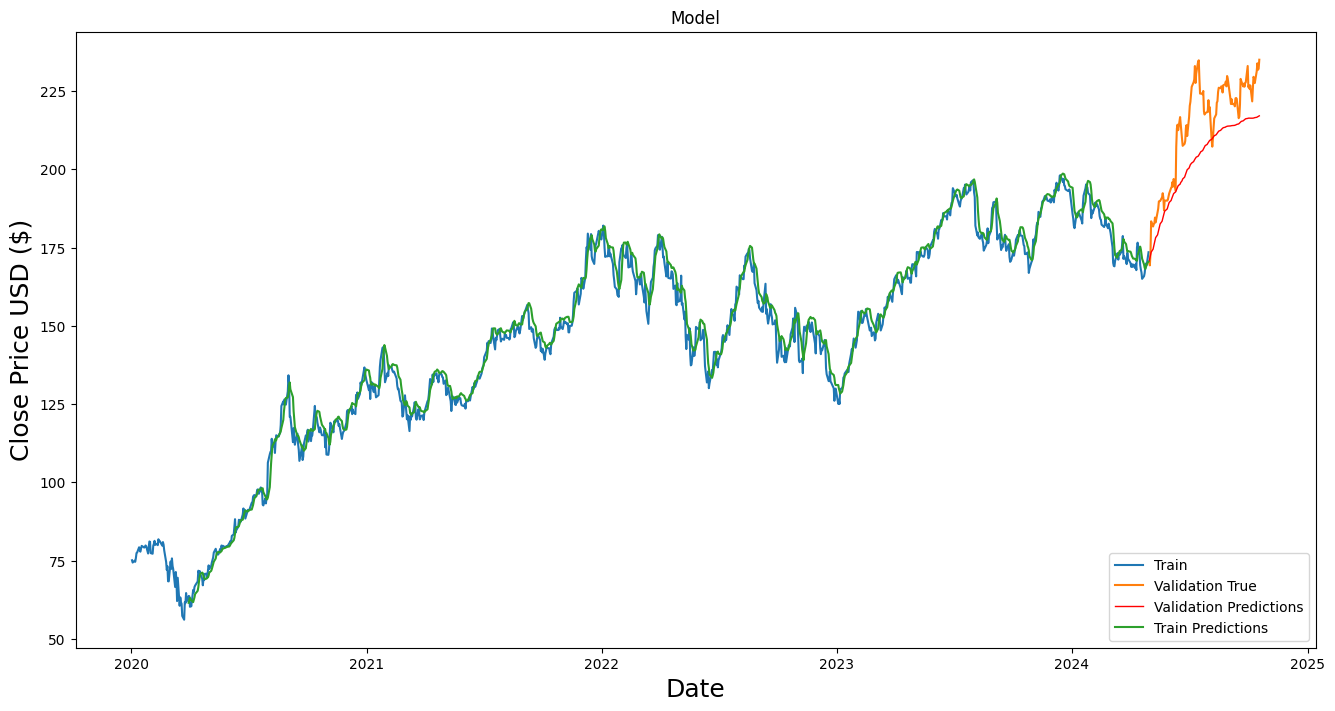

In [129]:
# Plot the data
plt.clf()
train = data[:training_data_len]
valid = data[training_data_len:training_data_len+n_days_to_predict]

valid['Predictions'] = predictions

# Adjusting train_predict to include the relevant range
train_predict = data[60:training_data_len]
train_predict['Predictions'] = lstm_train_predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training data
plt.plot(train['Close'], label='Train')

# Plot the validation true prices
plt.plot(valid['Close'], label='Validation True')

# Plot the validation predictions
plt.plot(valid['Predictions'], label='Validation Predictions', linewidth = 1, color = "red")

# Plot the training predictions
plt.plot(train_predict['Predictions'], label='Train Predictions')

# Set the legend with appropriate labels
plt.legend(loc='lower right')

plt.show()


<Figure size 640x480 with 0 Axes>

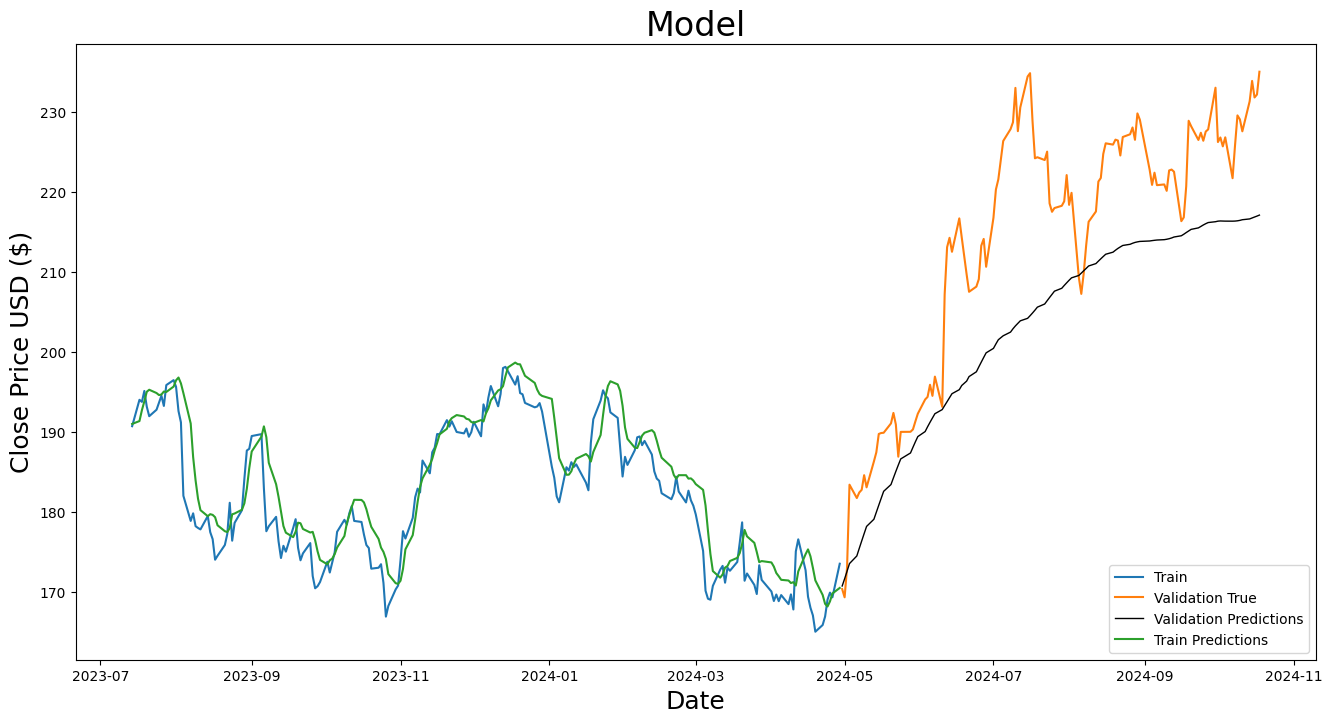

In [130]:
# Clear the figure
plt.clf()

# Slice the last 200 data points for training and validation
train = data[:training_data_len].tail(200)
valid = data[training_data_len:training_data_len + n_days_to_predict].tail(200)

# Ensure predictions align with valid data
valid['Predictions'] = predictions[-len(valid):]

# Adjusting train_predict to include the relevant range
train_predict = data[60:training_data_len].tail(200)
train_predict['Predictions'] = lstm_train_predictions[-len(train_predict):]

# Create the plot
plt.figure(figsize=(16, 8))
plt.title('Model', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training data
plt.plot(train.index[-200:], train['Close'], label='Train')

# Plot the validation true prices
plt.plot(valid.index, valid['Close'], label='Validation True')

# Plot the validation predictions
plt.plot(valid.index, valid['Predictions'], label='Validation Predictions', linewidth=1, color="black")

# Plot the training predictions
plt.plot(train_predict.index, train_predict['Predictions'], label='Train Predictions')

# Set the legend with appropriate labels
plt.legend(loc='lower right')
# Set x-ticks to display every 5th tick
# plt.xticks(ticks=range(0, 200+n_days_to_predict))

# Show the plot
plt.show()
